In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [324]:
# Importing the Hidden Connections network

hidden = pd.read_csv('Graphs/Data Tables Gephi/Connections - Hidden Connections [Nodes].csv', encoding='ISO-8859-1')
print(len(hidden))
print(hidden.head())

1480
     id  label  timeset  degree  weighted degree  eccentricity  \
0  4822    NaN      NaN       3              3.0           2.0   
1  3465    NaN      NaN       3              3.0           2.0   
2  4353    NaN      NaN       3              3.0           2.0   
3  3577    NaN      NaN       3              3.0           2.0   
4  1773    NaN      NaN       3              3.0           2.0   

   closnesscentrality  harmonicclosnesscentrality  betweenesscentrality  \
0            0.714286                         0.8          9.149290e-07   
1            0.714286                         0.8          9.149290e-07   
2            0.714286                         0.8          9.149290e-07   
3            0.714286                         0.8          9.149290e-07   
4            0.714286                         0.8          9.149290e-07   

   modularity_class  pageranks  componentnumber  clustering  triangles  \
0                 0   0.000676                0         0.0          0   

In [325]:
# Set the number of bins for ALL histograms

bins = 50

## Distributions of Hidden Connections metrics

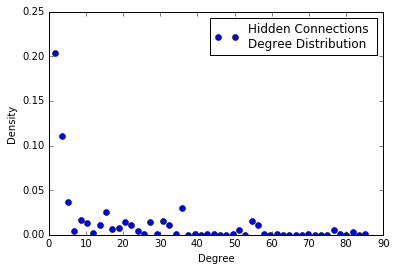

In [417]:
# Degree density distribution

hidden_degree_density, a = np.histogram(hidden['degree'], bins = bins, density = True)
hidden_degree = np.zeros(hidden_degree_density.shape)
for i in range(hidden_degree_density.shape[0]):
    hidden_degree[i] = a[i] + (a[i+1] - a[i])/2
    
# Plot  

plt.plot(hidden_degree, hidden_degree_density, 'o', label = 'Hidden Connections \nDegree Distribution')

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_degree_dist.png')

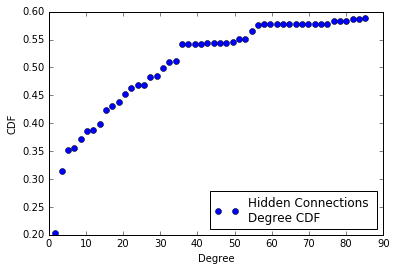

In [418]:
# Degree cdf

hidden_cdf = np.cumsum(hidden_degree_density)

# Plot

plt.plot(hidden_degree, hidden_cdf, 'o', label = 'Hidden Connections \nDegree CDF')

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("CDF")

plt.savefig('Graphs/hidden_degree_cdf.png')

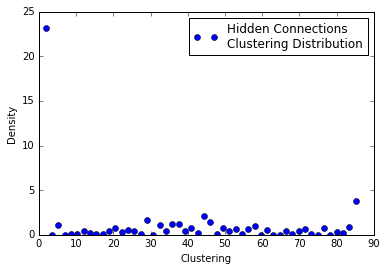

In [419]:
# Clustering density distribution

hidden_cluster_density, a = np.histogram(hidden['clustering'], bins = bins, density = True)

hidden_cluster = np.zeros(hidden_cluster_density.shape)
for i in range(hidden_cluster_density.shape[0]):
    hidden_cluster[i] = a[i] + (a[i+1] - a[i])/2
    
# Plot

plt.plot(hidden_degree, hidden_cluster_density, 'o', label = 'Hidden Connections \nClustering Distribution')

plt.legend(loc='best')
plt.xlabel("Clustering")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_degree_cluster.png')

## Erdos-Renyi Random Graph G(n, p)

In [331]:
# Set p and compute mu

p = 0.0015
mu = (len(hidden)-1) * p
print('mu =', mu)

mu = 2.2185


In [332]:
# Degree distribution

ER_degree = list(range(bins))
ER_degree_density = poisson.pmf(ER_degree, mu)

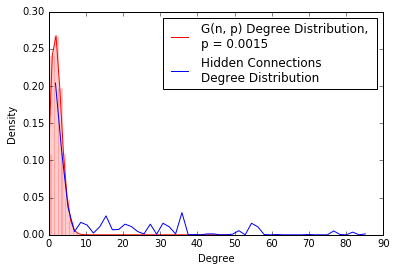

In [333]:
# Plot Hidden and Model degree distributions 

ER_label = 'G(n, p) Degree Distribution, \np = ' + str(p)
plt.plot(ER_degree, ER_degree_density, color = 'r', label = ER_label)
plt.vlines(ER_degree, 0, ER_degree_density, colors='r', lw=5, alpha=0.2)

hidden_label = 'Hidden Connections \nDegree Distribution'
plt.plot(hidden_degree, hidden_degree_density, label = hidden_label)

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_degree_dist_ER.png')

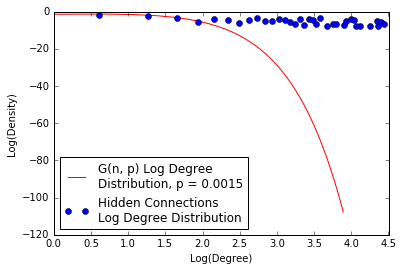

In [334]:
# Plot Hidden and Model LOG degree distributions 

ER_log_label = 'G(n, p) Log Degree \nDistribution, p = ' + str(p)
plt.plot(np.log(ER_degree), np.log(ER_degree_density), color = 'r', label = ER_log_label)

hidden_log_label = 'Hidden Connections \nLog Degree Distribution'
plt.plot(np.log(hidden_degree), np.log(hidden_degree_density), 'o', label = hidden_log_label)

plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/hidden_degree_dist_log_ER.png')

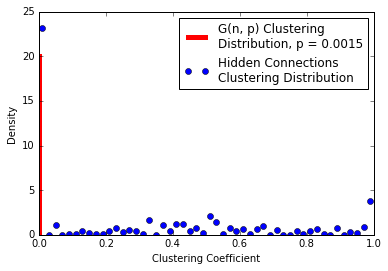

In [335]:
# Plot Hidden and Model degree distributions 

ER_cluster_label = 'G(n, p) Clustering \nDistribution, p = ' + str(p)
plt.plot((p, p), (0, 20), 'r', linewidth = 5, label = ER_cluster_label)

hidden_cluster_label = 'Hidden Connections \nClustering Distribution'
plt.plot(hidden_cluster, hidden_cluster_density, 'o', label = hidden_cluster_label)

plt.legend(loc='best')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_clustering_dist_ER.png')

## Preferential Attachment

In [336]:
# Set the number of links in added in a period (m) and the number of periods (t)
# t is equal to the number of nodes
# m is half the average degree since the total degree is 2tm

t = len(hidden)
m = hidden['degree'].mean() / 2
print('t =', t)
print('m =', round(m, 2))

t = 1480
m = 6.59


In [338]:
# Degree distribution

#PA_degree = np.linspace(0, 99, 100)

j = np.array(list(range(len(hidden)))) + 1
dj = m * (t / j)**0.5

#PA_degree_density = np.exp(np.log(2 * m**2) - 3 * np.log(PA_degree))

PA_degree_density, a = np.histogram(dj, bins = bins, density = True)

PA_degree = np.zeros(PA_degree_density.shape)
for i in range(PA_degree_density.shape[0]):
    PA_degree[i] = a[i] + (a[i+1] - a[i])/2

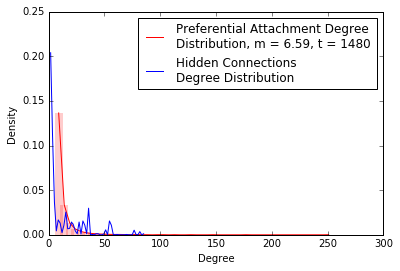

In [339]:
# Plot Hidden and Model degree distributions 

PA_label = 'Preferential Attachment Degree \nDistribution, m = ' + str(round(m, 2)) + ', t = ' + str(t)
plt.plot(PA_degree, PA_degree_density, color = 'r', label = PA_label)
plt.vlines(PA_degree, 0, PA_degree_density, colors='r', lw=8, alpha=0.2)

hidden_label = 'Hidden Connections \nDegree Distribution'
plt.plot(hidden_degree, hidden_degree_density, label = hidden_label)

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_degree_dist_PA.png')

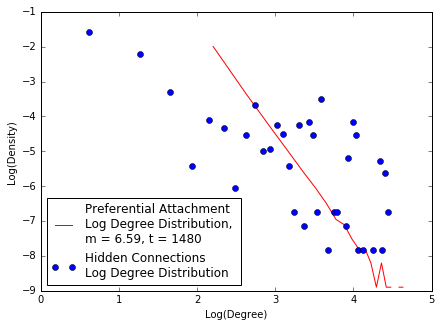

In [340]:
# Plot Hidden and Model LOG degree distributions 

plt.figure(figsize = (7,5))

PA_log_label = 'Preferential Attachment \nLog Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t)
plt.plot(np.log(PA_degree), np.log(PA_degree_density), color = 'r', label = PA_log_label)

hidden_log_label = 'Hidden Connections \nLog Degree Distribution'
plt.plot(np.log(hidden_degree), np.log(hidden_degree_density), 'o', label = hidden_log_label)

plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/hidden_degree_dist_log_PA.png')

In [341]:
# Run a linear regression on Hidden Connections degree distribution

lr = LinearRegression()
hidden_degree_lr = np.log(hidden_degree)[np.isinf(np.log(hidden_degree_density)) == False].reshape(-1,1)
hidden_degree_density_lr = np.log(hidden_degree_density)[np.isinf(np.log(hidden_degree_density)) == False].reshape(-1,1)
lr.fit(hidden_degree_lr, hidden_degree_density_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

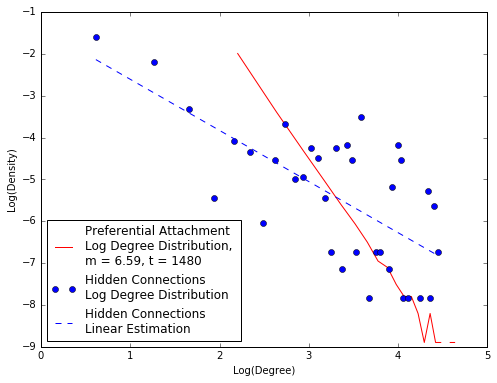

In [342]:
# Plot Hidden and Model LOG degree distributions with Linear Regression

plt.figure(figsize = (8,6))

PA_log_label = 'Preferential Attachment \nLog Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t)
plt.plot(np.log(PA_degree), np.log(PA_degree_density), color = 'r', label = PA_log_label)

hidden_log_label = 'Hidden Connections \nLog Degree Distribution'
plt.plot(np.log(hidden_degree), np.log(hidden_degree_density), 'o', label = hidden_log_label)

plt.plot(hidden_degree_lr, lr.predict(hidden_degree_lr), 'b--', label = 'Hidden Connections \nLinear Estimation')

plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/hidden_degree_dist_log_PA_regression.png')

## Simple Hybrid

In [400]:
# Set the m & t for Preferential attachment, and PICK the fraction of growing uniformly at random (a)

a = 0.99999
t = len(hidden)
m = hidden['degree'].mean() / 2
print('a =', a)
print('t =', t)
print('m =', round(m, 2))

a = 0.99999
t = 1480
m = 6.59


In [401]:
# Degree distribution

j = np.array(list(range(len(hidden)))) + 1
dj_H = (m + 2*a*m / (1-a)) * ((t / j)**((1-a)/2)) - 2*a*m / (1-a)

H_degree_density, b = np.histogram(dj_H, bins = bins, density = True)

H_degree = np.zeros(H_degree_density.shape)
for i in range(H_degree_density.shape[0]):
    H_degree[i] = b[i] + (b[i+1] - b[i])/2

In [402]:
#a = 0.9999

#x = 2/(1-a)

#H_degree_density = np.log(x) + x * np.log(m + a*m*x) - (x+1) * np.log(np.exp(hidden_degree) + a*m*x)
#H_degree_density = np.log(2 * m**2) - 3 * np.log(H_degree)

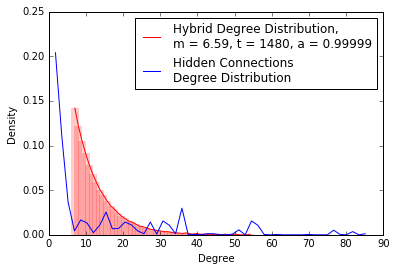

In [403]:
# Plot Hidden and Model degree distributions 

H_label = 'Hybrid Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t) + ', a = ' + str(a)
plt.plot(H_degree, H_degree_density, color = 'r', label = H_label)
plt.vlines(H_degree, 0, H_degree_density, colors='r', lw=8, alpha=0.2)

hidden_label = 'Hidden Connections \nDegree Distribution'
plt.plot(hidden_degree, hidden_degree_density, label = hidden_label)

plt.legend(loc='best')
plt.xlabel("Degree")
plt.ylabel("Density")

plt.savefig('Graphs/hidden_degree_dist_H.png')

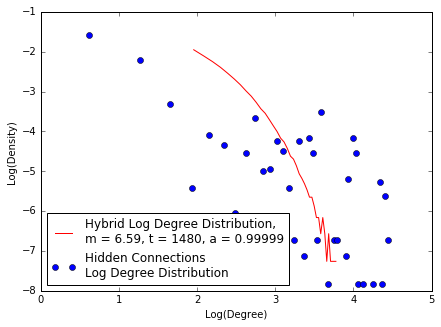

In [404]:
# Plot Hidden and Model LOG degree distributions 

plt.figure(figsize = (7,5))

H_log_label = 'Hybrid Log Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t) + ', a = ' + str(a)
plt.plot(np.log(H_degree), np.log(H_degree_density), color = 'r', label = H_log_label)

hidden_log_label = 'Hidden Connections \nLog Degree Distribution'
plt.plot(np.log(hidden_degree), np.log(hidden_degree_density), 'o', label = hidden_log_label)

plt.xlim([0,5])
plt.legend(loc='best')
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Density)")

plt.savefig('Graphs/hidden_degree_dist_log_H.png')

### Hybrid Model: Estimating $a$

In [405]:
# Creating a vector of a_0

a = np.linspace(0, 1, 21)
a = np.delete(a, len(a)-1)
b = np.linspace(0.99, 0.999999, 11)
a = np.append(a, b)
print('Vector of a_0 =', a)

Vector of a_0 = [ 0.         0.05       0.1        0.15       0.2        0.25       0.3
  0.35       0.4        0.45       0.5        0.55       0.6        0.65
  0.7        0.75       0.8        0.85       0.9        0.95       0.99
  0.9909999  0.9919998  0.9929997  0.9939996  0.9949995  0.9959994
  0.9969993  0.9979992  0.9989991  0.999999 ]


In [406]:
# Estimating a

a_est_list = np.zeros(len(a))
const_est_list = np.zeros(len(a))
const_derived_list = np.zeros(len(a))

for i in range(len(a)):
    log_kind_of_d = np.log(hidden_degree + 2 * a[i] * m / (1-a[i])).reshape(-1,1)
    log_kind_of_cdf = np.log(1 - hidden_cdf).reshape(-1,1)

    lr = LinearRegression(fit_intercept = True)
    lr.fit(log_kind_of_d, log_kind_of_cdf)

    a_est = 1 + 2 / lr.coef_[0][0]
    const_derived = a_est * np.log(m + m * (a_est - 2))

    a_est_list[i] = a_est
    const_est_list[i] = lr.intercept_[0]
    const_derived_list[i] = const_derived

In [407]:
a_est_list

array([-9.87598407, -9.30151202, -8.79710443, -8.33530178, -7.9005475 ,
       -7.48282217, -7.07497896, -6.67144341, -6.26749273, -5.8588021 ,
       -5.44111448, -5.00995601, -4.56034411, -4.08643857, -3.58107291,
       -3.03506794, -2.436154  , -1.76716432, -1.00278431, -0.10317807,
        0.75814487,  0.78178289,  0.80553862,  0.82941331,  0.85340821,
        0.8775246 ,  0.90176378,  0.92612708,  0.95061584,  0.97523141,
        0.99997519])

In [408]:
const_est_list

array([ -7.80549560e-02,  -3.55641204e-02,   6.71053138e-03,
         5.02019822e-02,   9.60277801e-02,   1.45252595e-01,
         1.99038537e-01,   2.58772710e-01,   3.26214940e-01,
         4.03703523e-01,   4.94472739e-01,   6.03177616e-01,
         7.36815343e-01,   9.06452147e-01,   1.13072163e+00,
         1.44364688e+00,   1.91459419e+00,   2.70969220e+00,
         4.34619411e+00,   9.57350629e+00,   5.88673311e+01,
         6.62675641e+01,   7.56395694e+01,   8.78661257e+01,
         1.04439036e+02,   1.28086238e+02,   1.64365083e+02,
         2.26536032e+02,   3.55551732e+02,   7.65370379e+02,
         1.32150645e+06])

In [409]:
const_derived_list

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [410]:
#a = 0.999

#H_degree = np.linspace(1, 100, 100)

In [411]:
#H_kind_of_cdf = 2 / (1-a) * np.log(m + 2 * a * m / (1-a)) - 2 / (1-a) * np.log(H_degree + 2 * a * m / (1-a))
#H_kind_of_cdf = H_kind_of_cdf.reshape(-1,1)

In [412]:
#hidden_kind_of_cdf = np.log(1 - hidden_cdf).reshape(-1,1)

In [413]:
#H_cdf = 1 - ((m + 2*a*m/(1-a))/(H_degree + 2*a*m/(1-a)))**(2/(1-a))

In [358]:
# Plot Hidden and Model LOG degree distributions 

#plt.figure(figsize = (7,5))

#H_log_label = 'Hybrid Log Degree Distribution, \nm = ' + str(round(m, 2)) + ', t = ' + str(t) + ', a = ' + str(a)
#plt.plot(H_degree, H_cdf, color = 'r', label = H_log_label)

#hidden_log_label = 'Hidden Connections \nLog Degree Distribution'
#plt.plot(hidden_degree, hidden_cdf, 'o', label = hidden_log_label)

#plt.ylim([-1,1])
#plt.legend(loc='best')
#plt.xlabel("Log(Degree)")
#plt.ylabel("Log(Density)")